# Business Sales Data Analysis

## Day 1: Data Understanding & Preparation

### Objective
To load the sales dataset, understand its structure, clean the data,
and prepare it for further business analysis.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("sales_data.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [20]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
df = df.dropna()


In [23]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [24]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [25]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])




In [26]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Revenue      406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


## Day 1 Summary

- Loaded the sales dataset successfully
- Explored dataset structure and statistics
- Handled missing values
- Created a revenue column
- Converted date column for time-based analysis

The dataset is now clean and ready for detailed business analysis.


# Day 2: Revenue Trend Analysis

## Objective
To analyze how revenue changes over time and identify overall business
growth patterns and seasonality.


In [27]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [28]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [29]:
df.set_index("InvoiceDate", inplace=True)


In [31]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns


Index(['invoiceno', 'stockcode', 'description', 'quantity', 'unitprice',
       'customerid', 'country', 'revenue'],
      dtype='object')

In [33]:
df.rename(columns={
    "description": "product",
    "unitprice": "unit_price",
    "country": "region"
}, inplace=True)

df.columns


Index(['invoiceno', 'stockcode', 'product', 'quantity', 'unit_price',
       'customerid', 'region', 'revenue'],
      dtype='object')

In [34]:
top_products = (
    df.groupby("product")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


product
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: revenue, dtype: float64

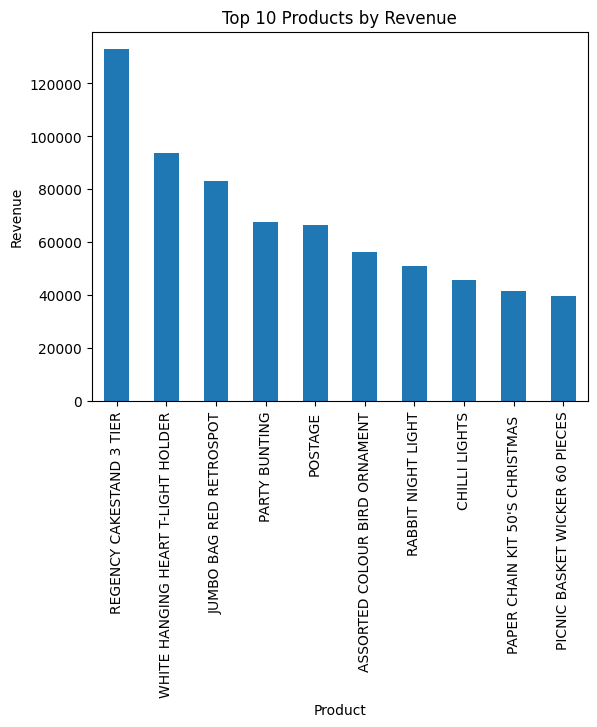

In [35]:
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()



In [36]:
region_revenue = (
    df.groupby("region")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

region_revenue


region
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates 

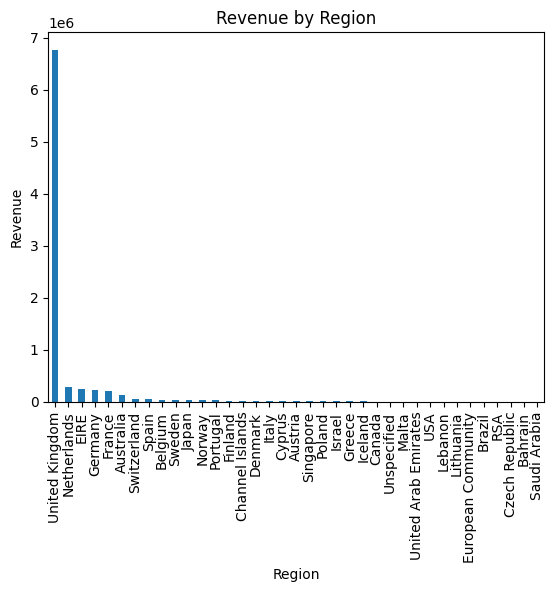

In [ ]:
region_revenue.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")s
plt.ylabel("Revenue")
plt.show()


### Note on Dataset

The dataset does not contain a time-based column. Therefore, analysis
focuses on revenue contribution by products and regions rather than
time-series trends.


# Day 3: Product, Customer & Regional Performance Analysis

## Objective
To identify top-performing products, high-value customers,
and regions that contribute the most to overall revenue.


In [38]:
df.head()


,invoiceno,stockcode,product,quantity,unit_price,customerid,region,revenue
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34


In [39]:
top_products = (
    df.groupby("product")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


product
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: revenue, dtype: float64

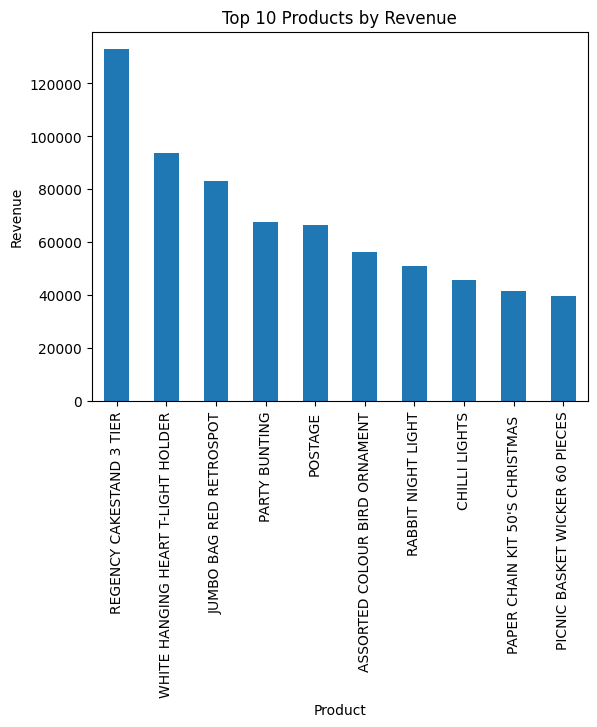

In [40]:
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


In [41]:
region_revenue = (
    df.groupby("region")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

region_revenue


region
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates 

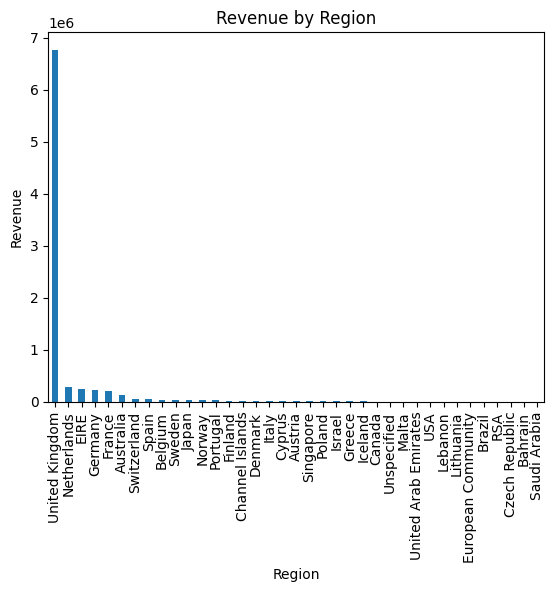

In [42]:
region_revenue.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()


In [43]:
top_customers = (
    df.groupby("customerid")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


customerid
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: revenue, dtype: float64

## Day 3 – Key Insights

- A small number of products contribute significantly to total revenue.
- Certain regions generate much higher revenue compared to others.
- High-value customers play a major role in overall sales.
- Some products generate high revenue despite lower quantities, indicating premium pricing.
